In [2]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
# train_data = pd.read_table('ratings_train.txt')
# test_data = pd.read_table('ratings_test.txt')

('ratings_test.txt', <http.client.HTTPMessage at 0x1b572d53198>)

In [3]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x1b572c91cf8>)

In [27]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

## Dropna

In [28]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [29]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [30]:
test_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [31]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [32]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 149995


In [33]:
from konlpy.tag import Okt

In [34]:
okt = Okt()

## 중복된 데이터 개수 확인

In [35]:
train_data['document'].nunique()

(146182, 2)

In [92]:
test_data['document'].nunique()

49157

## 중복된 데이터 삭제

In [36]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [93]:
test_data.drop_duplicates(subset=['document'], inplace=True)

In [37]:
train_data # 삭제된걸 볼 수 있다

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


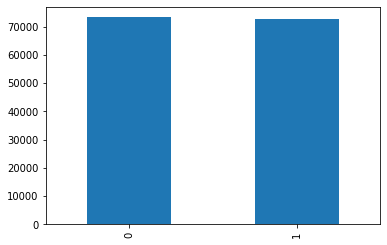

In [38]:
train_data['label'].value_counts().plot(kind = 'bar') # 비율 비슷

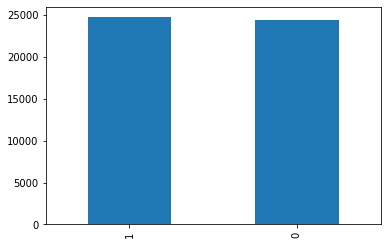

In [94]:
test_data['label'].value_counts().plot(kind = 'bar') 

## null 다시 확인

In [39]:
print(train_data.isnull().values.any()) # 이게 true가 나오면 결측치 있음

False


In [40]:
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [41]:
train_data.loc[train_data.document.isnull()]

,id,document,label


In [42]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 

False


In [95]:
print(test_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


## 특수문자 제거

In [43]:
train_data[:5] # 불필요한 특수문자를 제거해보자

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [44]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z 0-9 ]"," ")
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [96]:
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-z A-Z 0-9 ]"," ")
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,0


In [97]:
train_data['document'].replace('', np.nan, inplace=True) # 한글만 찾는건데, 빈 값은 nan으로 바꿔주고
print(train_data.isnull().sum()) # nan인거의 개수 찾기

id          0
document    0
label       0
token       0
dtype: int64


In [98]:
# 지우기
train_data = train_data.dropna(how = 'any')
print(len(train_data))

146182


## Tokenizing

In [67]:
from konlpy.tag import Okt
okt = Okt()

In [82]:
def tokenize(sentence):
    okt = Okt()
    tokenized_sentence = []

    for line in sentence:
        result = []
        temp_sentence = okt.pos(line, norm=True, stem=True)
        for i in temp_sentence:                             
            if (i[1] == 'Noun' or i[1] == 'Adjective' or i[1] == 'Alpha' 
                or i[1] == 'Number' or i[1] == 'Verb' or i[1] == 'KoreanParticle'):                  
                result.append(i[0])
            
        tokenized_sentence.append(result)

    return tokenized_sentence

In [90]:
train_data['token'] = tokenize(train_data['document'])

In [91]:
train_data 

,id,document,label,token
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[더빙, 진짜, 짜증나다, 목소리]"
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다, 않다]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[무재, 밓었, 다그, 래서, 보다, 추천]"
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[몬페, 의, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 늙다, 보이다, 하..."
...,...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0,"[인간, 문제, 소, 죄인]"
149996,8549745,평점이 너무 낮아서,1,"[평점, 낮다]"
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0,"[이, 뭐, 한국인, 거들다, 먹거리, 필리핀, 혼혈, 착하다]"
149998,2376369,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]"


In [99]:
test_data['token'] = tokenize(test_data['document'])

In [100]:
train_data 

,id,document,label,token
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[더빙, 진짜, 짜증나다, 목소리]"
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다, 않다]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[무재, 밓었, 다그, 래서, 보다, 추천]"
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[몬페, 의, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 늙다, 보이다, 하..."
...,...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0,"[인간, 문제, 소, 죄인]"
149996,8549745,평점이 너무 낮아서,1,"[평점, 낮다]"
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0,"[이, 뭐, 한국인, 거들다, 먹거리, 필리핀, 혼혈, 착하다]"
149998,2376369,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]"


In [106]:
# 토큰화된 데이터 pickle로 저장
import pandas as pd
import pickle

df_train = pd.DataFrame(train_data,columns=['token', 'label'])
df_test = pd.DataFrame(test_data,columns=['token','label'])


In [108]:
df_test 

,token,label
0,"[굳다, ㅋ]",1
1,[GDNTOPCLASSINTHECLUB],0
2,"[뭐, 이, 평점, 나쁘다, 않다, 10, 점, 짜다, 리, 더, 더욱, 아니다]",0
3,"[지루하다, 않다, 완전, 막장, 임, 돈, 주다, 보기]",0
4,"[3, D, 만, 아니다, 별, 다섯, 개, 주다, 왜, 3, D, 로, 나오다, ...",0
...,...,...
49995,"[만, 평점, 로, 기다, 하다, ㅋㅋ, 킹왕짱, 쌈뽕, 영화, 만나다, 강렬하다,...",1
49996,"[의지, 박약, 하다, 탈영, 일단, 주인공, 김대희, 닮다, 이등병, 찌다, 따다...",0
49997,"[그림, 좋다, 완성, 도도, 높다, 보다, 내내, 불안하다, 만들다]",0
49998,"[절대, 보다, 서다, 안, 되다, 영화, 재미, 없다, 기분, 잡, 하다, 세트,...",0


In [109]:
df_train.to_pickle('token_train_data_ver2.pkl')
df_test.to_pickle('token_test_data_ver2.pkl')